In [2]:
import tensorflow as tf
tf.__version__

'2.19.0'

In [75]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import ConfusionMatrixDisplay,classification_report

In [51]:
(x_train, y_train), (x_test, y_test)=mnist.load_data()
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [52]:
x_train=x_train/255.0
x_test=x_test/255.0

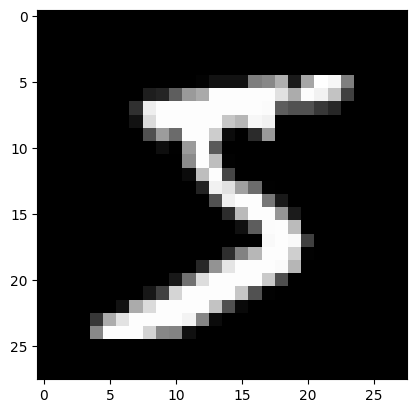

In [53]:
plt.imshow(x_train[0],cmap='gray')

In [63]:
y_train=y_train.reshape(-1,1)
y_test=y_test.reshape(-1,1)

ohe=OneHotEncoder()
y_train_new=ohe.fit_transform(y_train).toarray()
y_test_new=ohe.fit_transform(y_test).toarray()

y_train_new[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [64]:
x_train=x_train.reshape(-1,28,28,1)
x_test=x_test.reshape(-1,28,28,1)
x_train.shape, y_train_new.shape,x_test.shape

((60000, 28, 28, 1), (60000, 10), (10000, 28, 28, 1))

In [65]:
model=models.Sequential([
    layers.Conv2D(32,(3,3),activation='tanh',input_shape=(28,28,1)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.Flatten(),
    layers.Dense(10,activation='softmax')
])
model.summary()

C:\Users\Shree\anaconda3\envs\computer_vision\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │       368,650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 387,466 (1.48 MB)

 Trainable params: 387,466 (1.48 MB)

 Non-trainable params: 0 (0.00 B)

In [66]:
loss=tf.keras.losses.categorical_crossentropy
model.compile(loss=loss,metrics=['accuracy'])

In [68]:
model.fit(x_train,y_train_new,batch_size=32,validation_data=(x_test,y_test_new),epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 59s 32ms/step - accuracy: 0.9857 - loss: 0.0496 - val_accuracy: 0.9832 - val_loss: 0.0509
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 68s 36ms/step - accuracy: 0.9905 - loss: 0.0336 - val_accuracy: 0.9854 - val_loss: 0.0485
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 33ms/step - accuracy: 0.9927 - loss: 0.0263 - val_accuracy: 0.9876 - val_loss: 0.0441
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 69s 37ms/step - accuracy: 0.9943 - loss: 0.0192 - val_accuracy: 0.9850 - val_loss: 0.0513
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 65s 35ms/step - accuracy: 0.9962 - loss: 0.0153 - val_accuracy: 0.9846 - val_loss: 0.0637
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 33ms/step - accuracy: 0.9966 - loss: 0.0124 - val_accuracy: 0.9864 - val_loss: 0.0620
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 69s 37ms/step - accuracy: 0.9976 - loss: 0.0084 - val_accuracy: 0.9855 - val_loss: 0.0782
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 76s 33ms/step - accuracy: 0.9978 -

In [71]:
model.evaluate(x_train,y_train_new)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9999 - loss: 5.0775e-04


[0.0007588014705106616, 0.9997833371162415]

In [74]:
model.evaluate(x_test,y_test_new)[1]

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9825 - loss: 0.1206


0.9864000082015991

In [80]:
y_pred=model.predict(x_test)
tf.nn.softmax(y_pred)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


<tf.Tensor: shape=(10000, 10), dtype=float32, numpy=
array([[0.08533674, 0.08533674, 0.08533674, ..., 0.2319693 , 0.08533674,
        0.08533674],
       [0.08533674, 0.08533674, 0.2319693 , ..., 0.08533674, 0.08533674,
        0.08533674],
       [0.08533676, 0.23196921, 0.08533676, ..., 0.08533676, 0.08533677,
        0.08533676],
       ...,
       [0.08533674, 0.08533674, 0.08533674, ..., 0.08533674, 0.08533674,
        0.08533674],
       [0.08533674, 0.08533674, 0.08533674, ..., 0.08533674, 0.08533674,
        0.08533674],
       [0.08533674, 0.08533674, 0.08533674, ..., 0.08533674, 0.08533674,
        0.08533674]], dtype=float32)>

In [87]:
np.argmax(y_pred,axis=1)

array([7, 2, 1, ..., 4, 5, 6])

In [93]:
print(classification_report(y_test,np.argmax(y_pred,axis=1)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.98       892
           6       0.99      0.98      0.98       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

